## Load Data

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.expand_frame_repr", False) 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/nurfianqodar/skripsi/refs/heads/main/pengamatan.csv")
columns = pd.read_csv("https://raw.githubusercontent.com/nurfianqodar/skripsi/refs/heads/main/columns.csv")
legends = pd.read_csv("https://raw.githubusercontent.com/nurfianqodar/skripsi/refs/heads/main/legends.csv")

## Preview Data

### Sample Data

In [3]:
df.sample(5)

,tanggal,p,u,diameter_1,diameter_2,diameter_3,diameter_4
29,2025-08-08,F,5,8.3,8.5,9.1,8.6
48,2025-08-09,C,1,24.8,24.0,24.9,23.9
36,2025-08-09,A,1,23.6,23.9,24.0,23.5
15,2025-08-08,D,1,10.3,11.3,12.7,10.2
7,2025-08-08,B,3,12.3,12.2,12.9,10.7


### Columns Description

In [4]:
columns

,nama_kolom,keterangan
0,tanggal,Tanggal pengamatan
1,p,Perlakuan
2,u,Ulangan
3,diameter_1,Diameter isolat (mm) yang diukur lurus vertikal dengan arah huruf pada label
4,diameter_2,Diameter isolat (mm) yang diukur 45 derajat ke kanan dari diameter_1
5,diameter_3,Diameter isolat (mm) yang diukur 45 derajat ke kanan dari diameter_2
6,diameter_4,Diameter isolat (mm) yang diukur 45 derajat ke kanan dari diameter_3


### Legends

In [5]:
legends

,perlakuan,keterangan
0,A,Kontrol negatif (tanpa perlakuan)
1,B,Larutan ekstrak kulit nanas 50mg/mL
2,C,Larutan ekstrak kulit nanas 100mg/mL
3,D,Larutan ekstrak kulit nanas 200mg/mL
4,E,Larutan ekstrak kulit nanas 400mg/mL
5,F,Kontrol positif (fungisida kimia)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tanggal     90 non-null     object 
 1   p           90 non-null     object 
 2   u           90 non-null     int64  
 3   diameter_1  90 non-null     float64
 4   diameter_2  90 non-null     float64
 5   diameter_3  90 non-null     float64
 6   diameter_4  90 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 5.1+ KB


## Cleaning Data

In [7]:
df_clean = df
df_clean["diameter_mm"] = df_clean[["diameter_1", "diameter_2", "diameter_3", "diameter_4",]].mean(axis=1)
df_clean["tanggal"] = pd.to_datetime(df_clean["tanggal"])
df.sample(5)

,tanggal,p,u,diameter_1,diameter_2,diameter_3,diameter_4,diameter_mm
27,2025-08-08,F,3,10.3,9.9,9.4,8.6,9.55
84,2025-08-07,E,5,8.0,8.0,8.0,8.0,8.00
54,2025-08-09,B,4,18.6,19.4,18.8,19.6,19.10
65,2025-08-07,B,1,8.0,8.0,8.0,8.0,8.00
41,2025-08-09,A,5,25.5,25.4,25.6,28.7,26.30


In [8]:
drop_cols = ["diameter_1", "diameter_2", "diameter_3", "diameter_4"]
df_clean = df_clean.drop(columns=drop_cols)
df_clean.sample(5)

,tanggal,p,u,diameter_mm
87,2025-08-07,F,3,8.000
50,2025-08-09,F,3,17.875
0,2025-08-08,A,1,8.950
81,2025-08-07,E,2,8.000
51,2025-08-09,C,5,24.950


## Ringkasan Statistik

In [9]:
from IPython.display import display, HTML
display(HTML(df_clean.drop(columns=["u"]).groupby(["tanggal", "p"]).describe().to_html()))

## Visualisasi

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Theme bersih dan profesional
sns.set_theme(
    style="whitegrid",           # latar putih + grid tipis
    context="talk",              # font sedikit besar, cocok untuk presentasi/skripsi
    palette="colorblind"         # aman untuk pembaca dengan buta warna
)

# Modifikasi detail font & grid
plt.rcParams.update({
    "axes.titlesize": 16,        # ukuran judul
    "axes.labelsize": 14,        # ukuran label sumbu
    "xtick.labelsize": 12,       # ukuran label x
    "ytick.labelsize": 12,       # ukuran label y
    "axes.edgecolor": "black",   # garis sumbu hitam
    "axes.linewidth": 1.0,       # ketebalan garis sumbu
    "grid.color": "gray",        # warna grid
    "grid.linestyle": "--",      # grid putus-putus
    "grid.linewidth": 0.5,       # ketebalan grid tipis
    "legend.fontsize": 12,       # ukuran font legenda
    "legend.frameon": True,      # kotak legenda
    "legend.framealpha": 0.9,    # transparansi legenda
    "figure.dpi": 300            # kualitas tinggi untuk cetak
})

### Grafik Pertumbuhan

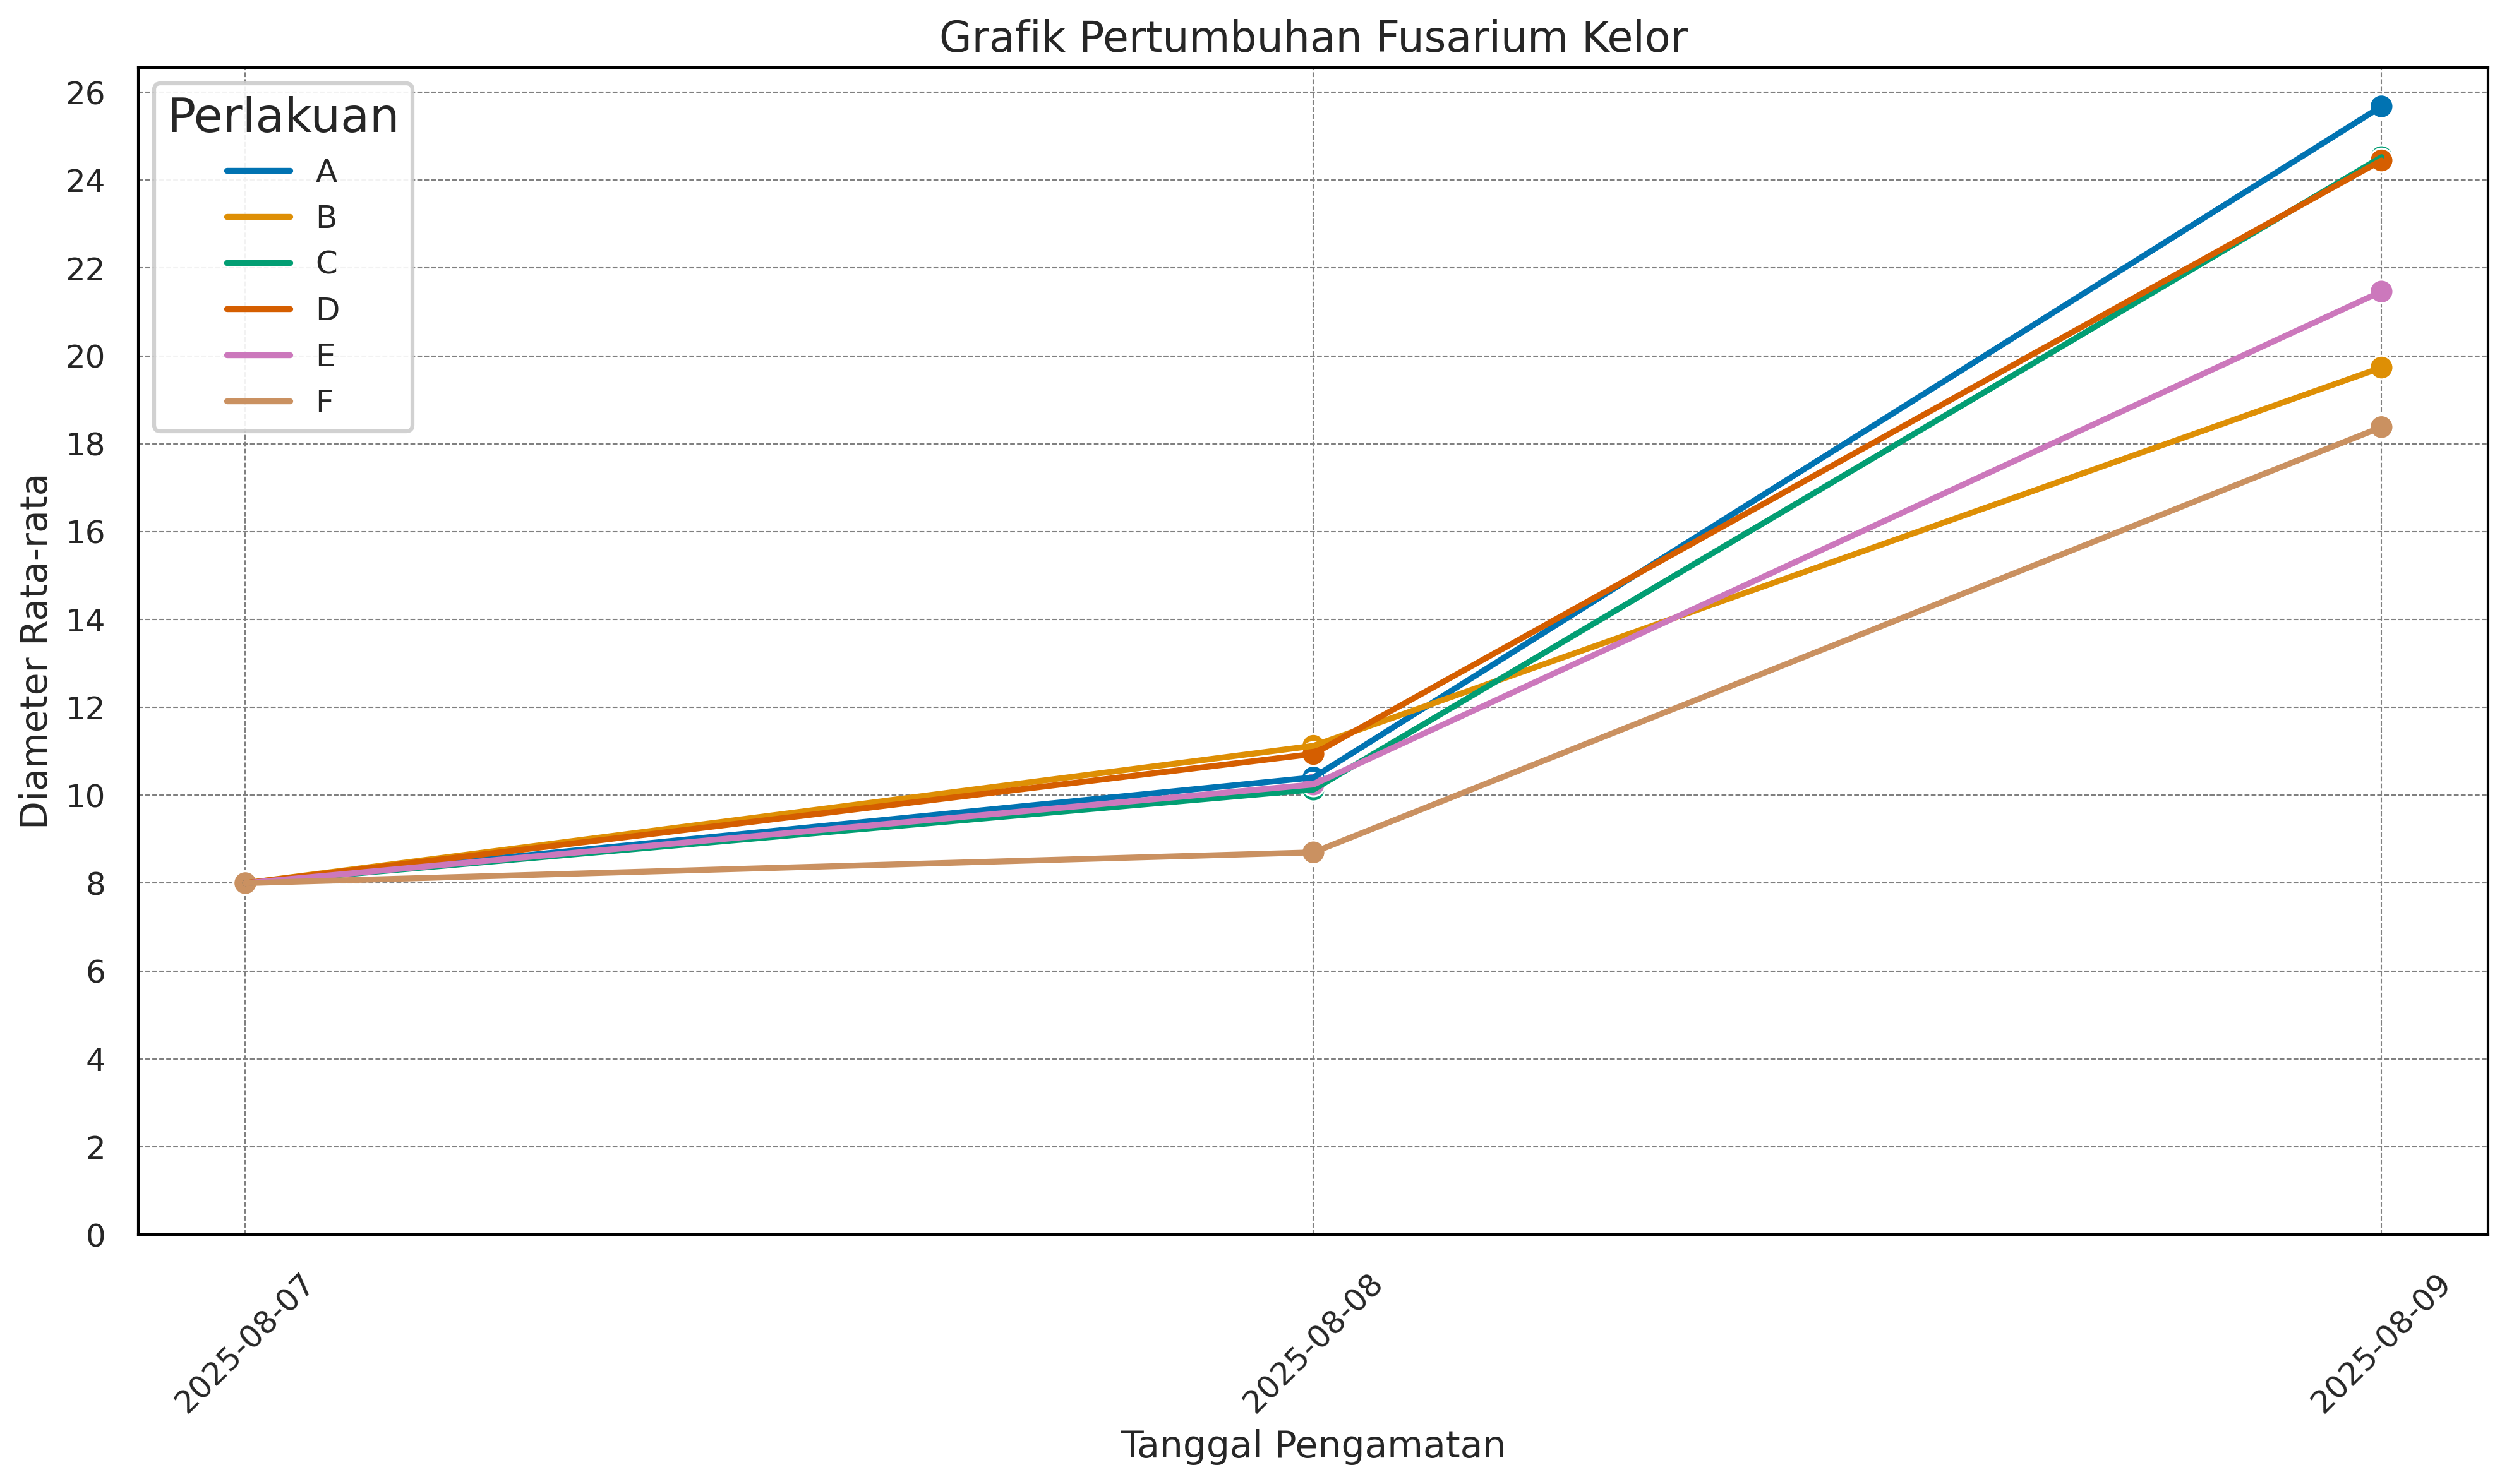

In [11]:
plt.figure(figsize=(16, 8,))

df_grouped = df_clean.groupby(by=["tanggal","p"]).agg({"diameter_mm": "mean"}).reset_index()

sns.lineplot(data=df_grouped,
             x="tanggal",
             y="diameter_mm",
             hue="p",
             errorbar=None)

sns.scatterplot(data=df_grouped,
             x="tanggal",
             y="diameter_mm",
             hue="p",
             legend=None)

plt.title("Grafik Pertumbuhan Fusarium Kelor")
plt.xlabel("Tanggal Pengamatan")
plt.ylabel("Diameter Rata-rata")
plt.legend(title="Perlakuan")

plt.yticks(np.arange(0, df_clean.diameter_mm.max(axis=0), 2))
plt.xticks(df_clean.tanggal.unique(),rotation=45)
plt.show()